#Lesson 111: K-Means Clustering - Outliers Removal and Customer Segmentation

---

#### Customer Segmentation Problem Statement


We have a transactional dataset that contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The company wants to segment its customers and determine marketing strategies according to these segments.

The dataset consists of the following attributes:

- `InvoiceNo`: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

- `StockCode`: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

- `Description`: Product (item) name. Nominal.

- `Quantity`: The quantities of each product (item) per transaction. Numeric.

- `InvoiceDate`: Invoice date and time. Numeric, the day and time when each transaction was generated. The date-time format used here is `yyyy-mm-dd hh:mm:ss`.

- `UnitPrice`: Unit price. Numeric, product price per unit in pound sterling, also known as GBP (Great Britain Pound).

- `CustomerID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

- `Country`: Country name. Nominal, the name of the country where each customer resides.



**Dataset Credits:** https://archive.ics.uci.edu/ml/datasets/online+retail

**Citation:** Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.


---

#### Recap

#### Loading the Dataset





**Dataset Link:** https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/online-retail-customers.xlsx



In [ ]:
# Read the dataset and create a Pandas DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/online-retail-customers.xlsx"
df = pd.read_excel(file_path)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


---

#### Removing the Cancelled Orders



In [ ]:
# Check the data type of 'InvoiceNo' field
type(df['InvoiceNo'][0])

int

In [ ]:
# Convert 'InvoiceNo' field to string and verify whether the data type is converted or not.
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
type(df['InvoiceNo'][0])

str

In [ ]:
# Use regex to find 'C' in the 'InvoiceNo' field
import re
df[df['InvoiceNo'].str.contains(pat = 'C', flags = re.IGNORECASE)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
# Check total number of orders including cancelled orders.
df['InvoiceNo'].shape[0]

541909

In [ ]:
# Remove canceleled invoices from the dataset
df = df[~(df['InvoiceNo'].str.contains('C', flags = re.IGNORECASE, regex = True))]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


---

#### Removing Missing Values

In [ ]:
# Obtain the number of missing or null values in df
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134697
Country             0
dtype: int64

In [ ]:
# Determine the percentage of null values in each column.
df.isnull().sum() * 100 / df.shape[0]

InvoiceNo       0.000000
StockCode       0.000000
Description     0.272990
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.289465
Country         0.000000
dtype: float64

In [ ]:
# Remove the null valued rows.
print(f"Before removing null values:\nNumber of rows = {df.shape[0]}")
df.dropna(inplace = True)
print(f"After removing null values:\nNumber of rows = {df.shape[0]}")

Before removing null values:
Number of rows = 532621
After removing null values:
Number of rows = 397924


In [ ]:
# Again obtain the number of null values in df.
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Check the data type of CustomerID column.
df['CustomerID'].dtype

dtype('float64')

In [ ]:
# Convert 'CustomerID' field to integer based categorical column.
df['CustomerID'] = df['CustomerID'].astype('int64').astype('category')
df['CustomerID'].dtype

CategoricalDtype(categories=[12346, 12347, 12348, 12349, 12350, 12352, 12353, 12354,
                  12355, 12356,
                  ...
                  18273, 18274, 18276, 18277, 18278, 18280, 18281, 18282,
                  18283, 18287],
, ordered=False)

---

#### RFM Analysis



In [ ]:
# Check the first 5 samples of the DataFrame
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
# Obtain the the total purchase amount for the customers
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# Obtain the number of unique customers
df['CustomerID'].unique()

[17850, 13047, 12583, 13748, 15100, ..., 13436, 15520, 13298, 14569, 12713]
Length: 4339
Categories (4339, int64): [12346, 12347, 12348, 12349, ..., 18281, 18282, 18283, 18287]

In [ ]:
# Obtain the Monetary information from the DataFrame
monetary_df = df[['CustomerID', 'TotalPrice']].groupby('CustomerID', as_index = False).sum()
monetary_df.rename(columns = {'TotalPrice' : 'Monetary'}, inplace = True)
monetary_df

,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4334,18280,180.60
4335,18281,80.82
4336,18282,178.05
4337,18283,2094.88


In [ ]:
# Obtain the Frequency information from the DataFrame
frequency_df =  df[['CustomerID', 'InvoiceNo']].groupby('CustomerID', as_index = False).count()
frequency_df.rename(columns = {'InvoiceNo': 'Frequency'}, inplace = True)
frequency_df

,CustomerID,Frequency
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4334,18280,10
4335,18281,7
4336,18282,12
4337,18283,756


---

#### Merging DataFrames



In [ ]:
# Merge 'monetary_df' and 'frequency_df' DataFrames.
rfm_df = pd.merge(monetary_df, frequency_df, on='CustomerID', how = 'inner')
rfm_df.head()

,CustomerID,Monetary,Frequency
0,12346,77183.60,1
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


---

#### Calculating Recency


In [ ]:
# Obtain the last purchase date for each customer
recency_df = df[['CustomerID', 'InvoiceDate']].groupby('CustomerID', as_index = False).max()
recency_df.rename(columns = {'InvoiceDate': 'LastPurchaseDate'}, inplace = True)
recency_df

,CustomerID,LastPurchaseDate
0,12346,2011-01-18 10:01:00
1,12347,2011-12-07 15:52:00
2,12348,2011-09-25 13:13:00
3,12349,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00
...,...,...
4334,18280,2011-03-07 09:52:00
4335,18281,2011-06-12 10:53:00
4336,18282,2011-12-02 11:43:00
4337,18283,2011-12-06 12:02:00


In [ ]:
# Obtain the last invoice date in the dataset.
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
# Obtain the present date i.e LastPurchaseDate + 1 day
present_date = df['InvoiceDate'].max() + pd.Timedelta("1 day")
present_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
# Obtain the days since last purchase made by a customer
days_last_purchase = present_date - recency_df['LastPurchaseDate']
days_last_purchase

0      326 days 02:49:00
1        2 days 20:58:00
2       75 days 23:37:00
3       19 days 02:59:00
4      310 days 20:49:00
              ...       
4334   278 days 02:58:00
4335   181 days 01:57:00
4336     8 days 01:07:00
4337     4 days 00:48:00
4338    43 days 03:21:00
Name: LastPurchaseDate, Length: 4339, dtype: timedelta64[ns]

In [ ]:
# Extract days from datetime using 'dt.days' attribute
recency_days = days_last_purchase.dt.days
recency_days

0       326
1         2
2        75
3        19
4       310
       ... 
4334    278
4335    181
4336      8
4337      4
4338     43
Name: LastPurchaseDate, Length: 4339, dtype: int64

In [ ]:
# Add 'recency_days' as column to the merged DataFrame 'rfm_df'.
rfm_df['Recency'] = recency_days
rfm_df

,CustomerID,Monetary,Frequency,Recency
0,12346,77183.60,1,326
1,12347,4310.00,182,2
2,12348,1797.24,31,75
3,12349,1757.55,73,19
4,12350,334.40,17,310
...,...,...,...,...
4334,18280,180.60,10,278
4335,18281,80.82,7,181
4336,18282,178.05,12,8
4337,18283,2094.88,756,4


We now have a DataFrame for RFM analysis consisting of the necessary fields to carry out the customer segmentation.

Let us now analyse the `rfm_df` DataFrame obtained after RFM analysis and prepare it for K-Means clustering.



---

#### Activity 1: Data Analysis

For clustering, the `CustomerID` field is not required hence it can be dropped from the `rfm_df` DataFrame.

In [ ]:
# S1.1: Dropping the 'CustomerID' column
rfm_df.drop(columns = 'CustomerID',inplace = True)

Let's create histogram and boxplots to understand the distribution of `Monetary`, `Frequency`, and `Recency` columns.

Use `subplots()` function of `matplotlib.pyplot` module to display all the three histograms in the first row and the boxplots in the second row.

Follow the steps given below to create this subplot:
1. Call the `subplots()` function on an object of `matplotlib.pyplot` and unpack the figure and axis objects in two different variables, say `fig` and `axis`. Inside the `subplots()` function, pass:

  - `nrows = 2` and `ncols = 3` parameters to create a figure having 2 rows and 3 columns.

  - `figsize = (15, 5)` parameter to create the figure of 15 units wide and 5 units high.

  - `dpi = 100` parameter to further enlarge the figure based on their pixel density.

2. Construct a histogram to visualise the distribution of `Monetary` column using first row, first column subplot's axes i.e `axis[0, 0]`.

3. Construct a boxplot to visualise the distribution of `Monetary` column using second row, first column subplot's axes i.e `axis[1, 0]`.

4. Also call the `set_title()` function using the `axis[0, 0]` object to set the `title` for histogram and boxplot.

5. Similarly, construct histograms and boxplots for `Frequency` and `Recency` columns using the respective subplots's axes.

6. Call the `show()` function on the `matplotlib.pyplot` object.


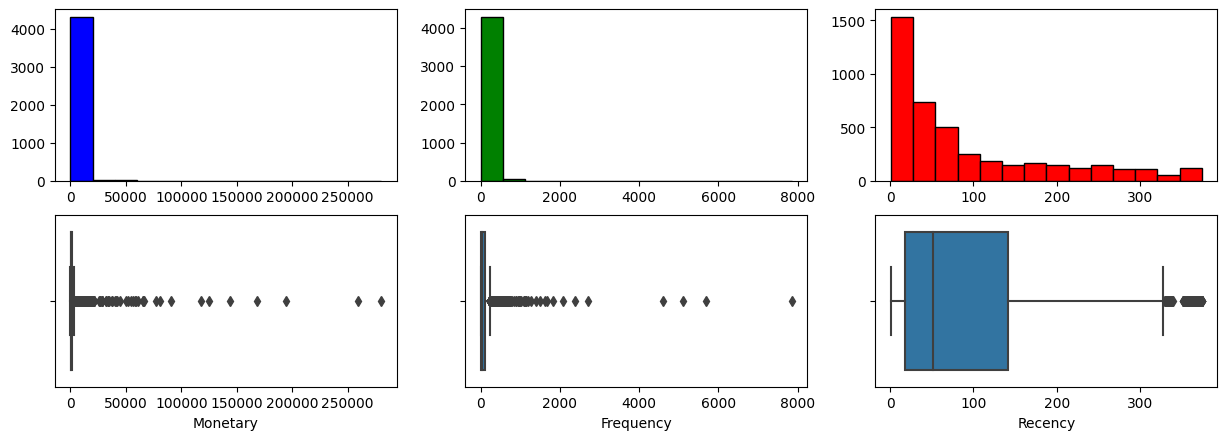

In [ ]:
# S1.2: Obtain the histogram and boxplots
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Construct Histogram and Boxplot for 'Monetary'
fig,axis = plt.subplots(nrows = 2,ncols = 3,figsize=(15,5),dpi = 100)
axis[0,0].hist(rfm_df['Monetary'],bins = 'sturges',edgecolor = 'black',color = 'b')
sns.boxplot(rfm_df['Monetary'],ax = axis[1,0])
# Construct Histogram and Boxplot for 'Frequency'
axis[0,1].hist(rfm_df['Frequency'],bins = 'sturges',edgecolor = 'black',color = 'g')
sns.boxplot(rfm_df['Frequency'],ax = axis [1,1])

# Construct Histogram and Boxplot for 'Recency'
axis[0,2].hist(rfm_df['Recency'],bins = 'sturges',edgecolor = 'black',color = 'red')
sns.boxplot(rfm_df['Recency'],ax = axis [1,2])

From the above plot it is clear there are lot of outliers in `Monetary` and `Frequency` fields.

These outliers will affect the model as the K-Means clustering is based on the distance of data points from the cluster centroids. These outliers will shift the cluster centroids away from their intended positions thereby generating inaccurate clusters. To compensate for this we need to remove the outliers.


---

#### Activity 2: Removing Outliers

We had already learned how boxplots are useful in identifying outliers in column data in one of the previous lessons (*Lesson: Meteorite Landings - Box Plots*). Let us recall that.

**What are outliers?**
- Outlier is a value in a data series that is either very small or very large.
- Outliers are abnormal values that can affect the overall observation due to its very high or very low extreme values.
- Hence they should be removed from the actual data.

The best way to detect outliers is to create a boxplot. It plots the minimum, first quartile, second quartile, third quartile, and maximum values in the form of a box. Any value beyond minimum and maximum limit is considered as an outlier.


<center>
<img src= "https://s3-whjr-v2-prod-bucket.whjr.online/fc916def-1fd4-4a16-8a7f-caadecafdecc.jpg" height = 350 /></center>


- **Median or Second quartile ($Q2$):** The middle value of the dataset. Also known as $50^\text{th}$ percentile.
    
- **First quartile ($Q1$):** The middle value between the smallest value (not the "minimum") and the median of the dataset. Also known as $25^\text{th}$ percentile which means that $25\%$ of the data lies between smallest value and $Q1$.

- **Third quartile ($Q3$):** The middle value between the median and the highest value (not the "maximum") of the dataset. Also known as  $75^\text{th}$ percentile which means 75% of the data lies between smallest value and $Q3$.

- **InterQuartile Range ($IQR$):**  $25^\text{th}$ to the  $75^\text{th}$ percentile. $IQR$ tells how spread the middle values are. It is defined as:

\begin{align}
IQR = Q3 - Q1
\end{align}

- **Minimum or Lower Bound:** $Q1 -1.5 \times IQR$

- **Maximum or Upper Bound:** $Q3 + 1.5 \times IQR$

- **Outliers:** These are the points that lies beyond the "Minimum" and "Maximum" value. So any value more than the upper bound or lesser than the lower bound will be considered as outliers.

Let's define a `remove_outliers()` function which removes outlier from the column data and returns an outlier free DataFrame. This function takes two parameters as input:
 - `df`: The DataFrame which consists of columns containing outliers.
 - `col`: The column of DataFrame `df` from which the outliers needs to be flushed out.

Inside this function,

1. Calculate $Q1$ or $25^\text{th}$ quartile for `col` column using `quantile()` function of `pandas` module and store it in a `q1` variable. Pass `0.25` as input to `quantile()` function.

  **Syntax of `quantile()` function:** `DataFrame.quantile(q)` where, `q` is the quantile to be computed. By default, `q = 0.5` ($50\%$ quantile)

2. Calculate $Q3$ or $75^\text{th}$ quartile for `col` column using `quantile()` function and store it in a `q3` variable. Pass `0.75` as input to `quantile()` function.

3. Calculate $IQR$ by subtracting `q3` from `q1` and store it in a `iqr` variable.

4. Calculate lower bound and upper bound using the following formula and store it in `lower_bound` and `upper_bound` variables respectively.

$$\text{Lower Bound}=Q1 - 1.5 \times IQR$$
$$\text{Upper Bound}=Q3 + 1.5 \times IQR$$

5. Obtain only those values from `df` DataFrame which matches the following condition:

    `(df[col] >= lower_bound) & (df[col] <= upper_bound)`
  
  This condition will return those values of the `col` column which are between lower bound and upper bound.

6. Return the filtered DataFrame.

**Note:** Here, the terms **quartile** and **quantile** are being used interchangeably. However, quantile is something that divides the dataset into equal parts. A quantile that divides the dataset into 4 equal parts i.e. at 0.25, 0.5 , 0.75, 1.00 is called a quartile. Thus, quartile is a type of quantile.


In [ ]:
# S2.1: Create a function for removing the outliers.
def outliers_fun(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr= q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df1 = df[(df[col]>= lower_bound) & (df[col]<= upper_bound)]

    return df1


Now that we have created a function for removing outliers, we can easily remove outliers from `rfm_df` DataFrame.

To remove the outliers from the `Monetary` field:

1. Call the `remove_outliers()` function and pass `rfm_df` and  `'Monetary'` as input to this function. Save the returned DataFrame in a `m_clean_df` variable.

2. Reset the index of `m_clean_df` DataFrame using `reset_index(drop = True)` function. This function deletes the old index and resets the index in the new DataFrame.

In [ ]:
# S2.2: Removing outliers from 'Monetary' field
m_clean_df = outliers_fun(rfm_df,'Monetary')
m_df1 = m_clean_df.reset_index(drop = True)
m_df1.head()

,Monetary,Frequency,Recency
0,1797.24,31,75
1,1757.55,73,19
2,334.40,17,310
3,2506.04,85,36
4,89.00,4,204


The `rfm_df` had 4339 rows and after removal of outliers `m_clean_df` has 3912 rows which means there were $4339 - 3912 = 427$ outliers in the `Monetary` field.

Let us again create boxplots for the `Recency`, `Monetary`, and `Frequency` field and observe whether there is any improvement in data distribution. Use subplots to create these multiple plots.

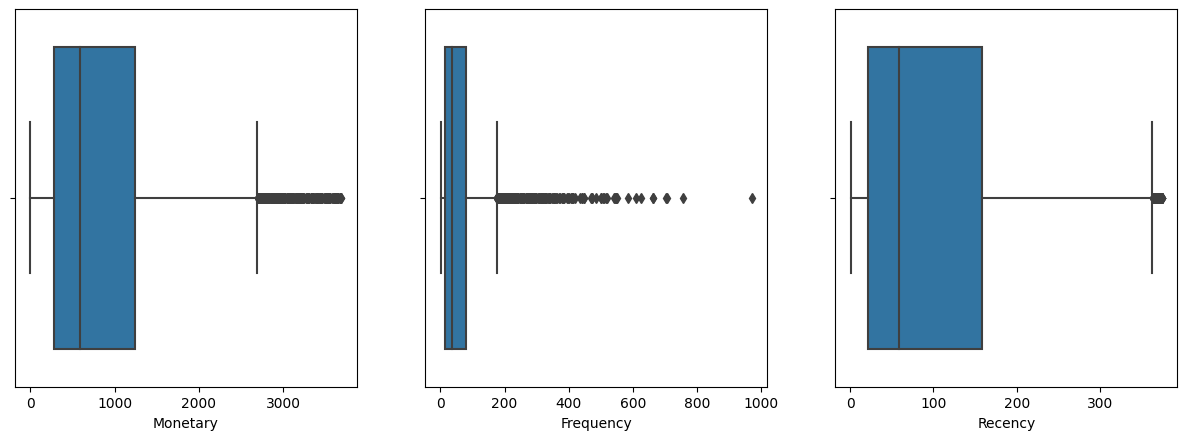

In [ ]:
# S2.3: Obtain the boxplots

# Construct Boxplot for 'Monetary'
fig1,ax1 = plt.subplots(nrows = 1,ncols = 3,figsize=(15,5),dpi = 100)
sns.boxplot(m_df1['Monetary'],ax = ax1[0])

# Construct Boxplot for 'Frequency'
sns.boxplot(m_df1['Frequency'],ax = ax1[1])

# Construct Boxplot for 'Recency'

sns.boxplot(m_df1['Recency'],ax = ax1[2])



We can observe that lot of outliers has been removed from the `Monetary` and `Frequency` columns.

Next, let us standardise the  DataFrame, so that all the columns have mean equals to `0` and the standard deviation equals to `1`. For this,
1. Create an object of `StandardScaler()` class of `sklearn.preprocessing` module.
2. Apply `fit_transform()` function on `mf_cleaned_df` DataFrame and store the scaled values in a new DataFrame `scaled_df`.


In [ ]:
# S2.4: Normalise the RFM parameters
# Import StandardScaler Module from sklearn
from sklearn.preprocessing import StandardScaler
# Make an object 'StandardScaler()'
ss_model = StandardScaler()

# Perform fit and transform operation using 'fit_transform()'
trans_model = ss_model.fit_transform(m_df1)

# Make a new DataFrame
scaled_df = pd.DataFrame(data = trans_model,columns= m_df1.columns)
scaled_df

,Monetary,Frequency,Recency
0,1.099421,-0.394646,-0.244806
1,1.051512,0.148701,-0.796176
2,-0.666340,-0.575761,2.068980
3,1.954997,0.303943,-0.628796
4,-0.962557,-0.743940,1.025315
...,...,...,...
3907,-0.851989,-0.666319,1.753911
3908,-0.972431,-0.705130,0.798859
3909,-0.855067,-0.640446,-0.904481
3910,1.458695,8.984552,-0.943865


Let us again create histograms for `Monetary`, `Frequency`, and `Recency` columns to check whether all of them have similar mean and variance after standardisation.

(array([1272.,  681.,  501.,  222.,  177.,  165.,  165.,  130.,  143.,
         146.,  114.,   78.,  118.]),
 array([-0.97340247, -0.69090092, -0.40839937, -0.12589782,  0.15660372,
         0.43910527,  0.72160682,  1.00410836,  1.28660991,  1.56911146,
         1.85161301,  2.13411455,  2.4166161 ,  2.69911765]),
 <a list of 13 Patch objects>)

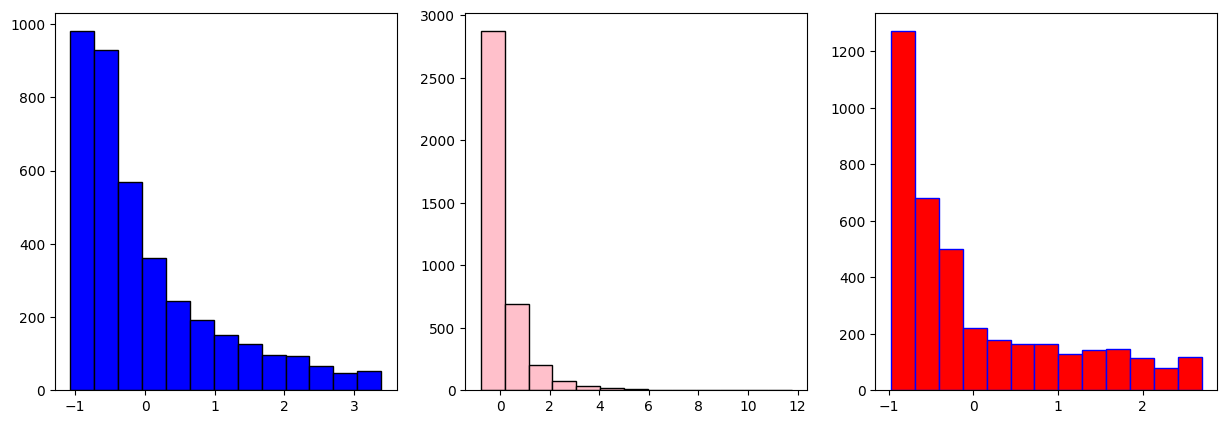

In [ ]:
# S2.5: Obtain the histograms.

# Construct Histogram for 'Monetary'
fig2,axis2 = plt.subplots(nrows = 1,ncols = 3,figsize=(15,5),dpi = 100)
axis2[0].hist(scaled_df['Monetary'],bins = 'sturges',edgecolor = 'black',color = 'b')


# Construct Histogram for 'Frequency'
axis2[1].hist(scaled_df['Frequency'],bins = 'sturges',edgecolor = 'black',color = 'pink')

# Construct Histogram for 'Recency'
axis2[2].hist(scaled_df['Recency'],bins = 'sturges',edgecolor = 'blue',color = 'r')

You may note that all the columns now have same mean and variance. Now our DataFrame is ready for K-Means clustering.

---

#### Activity 3: Applying K-Means Clustering

We start by finding the optimal number of clusters for the K-Means algorithm. We will use the Elbow method.

Recall the steps for Elbow method:
1. Compute K-Means clustering for different values of `K` by varying `K` from `1` to `10` clusters.
2. For each K, calculate the total within-cluster sum of square (WCSS) using `inertia_` attribute of `KMeans` object.
3. Plot the curve of WCSS vs the number of clusters `K`.


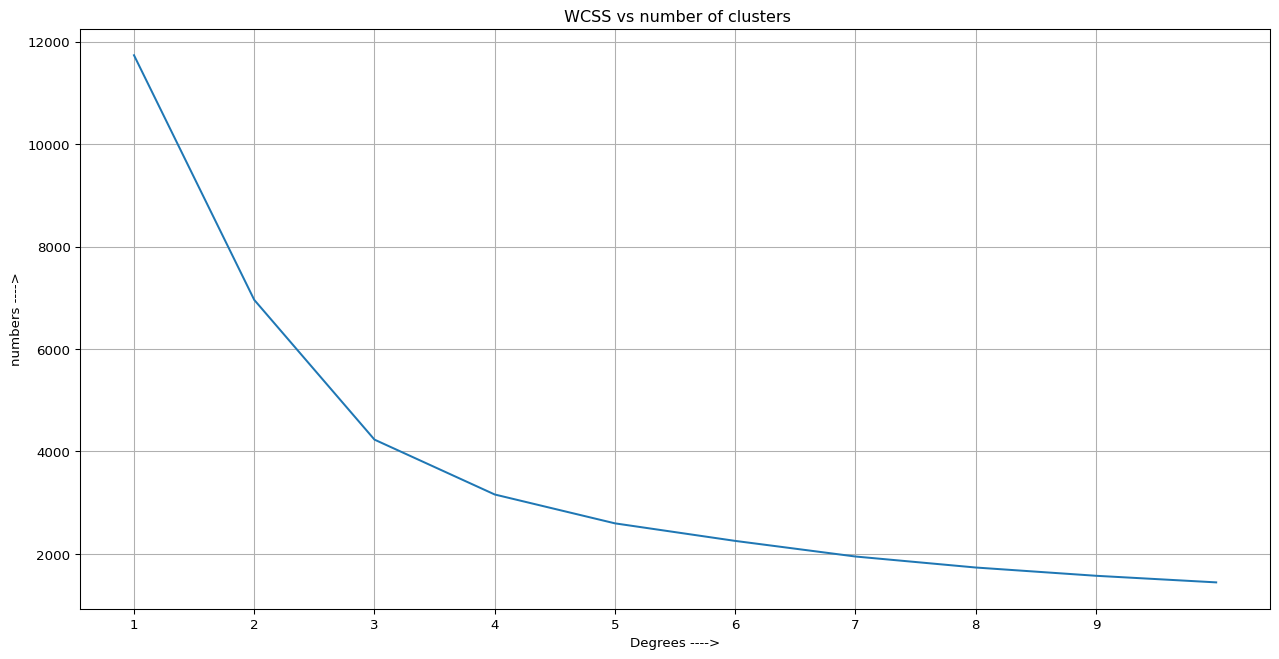

In [ ]:
# S3.1: Determine 'K' using Elbow method.
from sklearn.cluster import KMeans
wcss = []
num = range(1,11)
# Initiate a for loop that ranges from 1 to 10.
for i in num:

    # Inside for loop, perform K-means clustering for current value of K. Use 'fit()' to train the model.
    kmeans_model = KMeans(n_clusters = i, random_state = 10)
    kmeans_model.fit(scaled_df)
    # Find wcss for current K value using 'inertia_' attribute and append it to the empty list.
    wcss.append(kmeans_model.inertia_)

# Plot WCSS vs number of clusters.
plt.figure(figsize=(16,8),dpi= 96)
plt.title(" WCSS vs number of clusters")
plt.ylabel("numbers ---->")
plt.xlabel("Degrees ---->")
plt.plot(num,wcss)
plt.xticks(np.arange(1,10))
plt.grid()
plt.show()



From the above plot, it looks like decrease starts to slow down between 3 and 5. So you can choose any number of clusters from 3 to 5. Let us use 4 clusters to perform K-Means clustering.

Now, perform K-Means clustering with `n_clusters = 4` parameter and determine the cluster labels. Also, count the number of customers in each cluster.

In [ ]:
# S3.2: Clustering the dataset for K = 4
# Perform K-Means clustering with n_clusters = 4 and random_state = 10
kmeans_model2 = KMeans(n_clusters = 4,random_state = 10)

# Fit the model to the scaled_df
kmeans_model2.fit(scaled_df)

# Make a series using predictions by K-Means
k_pred = kmeans_model2.predict(scaled_df)
cluster_labels = pd.Series(k_pred)
cluster_labels.value_counts()

3    2024
0     983
2     786
1     119
dtype: int64

As you can see here, the data is divided into $4$ clusters labelled from `0` to `3`. For cluster visualisation we will not plot normalised DataFrame for scatter graph as the plot's axis won't convey any meaningful information.

Let's make a new DataFrame `km_df` by concatenating `mf_clean_df` and `cluster_labels` using `concat()` function of `pandas` module.

In [ ]:
# S3.4: Create a DataFrame with cluster labels for cluster visualisation
km_df = pd.concat([m_df1,cluster_labels],axis = 1)
km_df.columns = list(m_df1.columns) + ['Cluster Labels']
km_df.head()


,Monetary,Frequency,Recency,Cluster Labels
0,1797.24,31,75,2
1,1757.55,73,19,2
2,334.40,17,310,0
3,2506.04,85,36,2
4,89.00,4,204,0


The cluster labels for all the data points are now obtained, let's display those clusters using `scatter_3d()` function from `plotly.express` module.

In [ ]:
# S3.5: Visualising the clusters for customer segmentation
import plotly.express as px
px.scatter_3d(km_df,x = km_df['Monetary'],y = km_df['Frequency'],z = km_df['Recency'],color = cluster_labels)

**Summarising clusters:**

Let us calculate the mean recency, frequency, and monetary values of all the clusters by applying `agg()` function on `km_df` DataFrame.

In [ ]:
# S3.6: Understanding the Cluster Distribution
km_df.groupby(['Cluster Labels']).agg({'Recency' :['mean'],
                                     'Frequency':['mean'],
                                     'Monetary':['mean','count']})

Recency   Frequency     Monetary      
                      mean        mean         mean count
Cluster Labels                                           
0               254.555443   23.702950   380.182208   983
1                23.663866  374.268908  2405.071176   119
2                41.818066  118.938931  2096.399810   786
3                51.755929   39.172925   573.128984  2024

The above dataframe gives an optimal interpretation of clusters. Let us understand what each cluster represent.



- The <b><font color = blue>first cluster</font></b> (label 3) belongs to the "Promising Customers" segment as:
    - They purchased recently (`R = 52 days`).
    - Average purchase frequency is very less (`F = 39 purchases`).
    - They spend little (`M = 573 GBP`).

- The <b><font color= purple>second cluster</font></b> (label 0) belongs to the "Almost Lost Customers" segment as:
  - Their last purchase  is long ago (`R = 255 days`).
  - Average purchase frequency is very less (`F = 24 purchases`).
  - They spend very little (`M = 380 GBP`).

- The "best customers" are in <b><font color = orange>third cluster</font></b> (label 2) and <b><mark>fourth cluster</mark></b> (label 1). They spent the greatest amount of money, made many purchases and their last purchase was few days before.

Hence, we can see that using K-Means clustering we divided customers into clusters. Customers in each cluster have similar buying behaviours, so we can use them to personalise marketing offers.

But there are certain challenges with K-means. Let us discuss them one by one.

1. **Clustering outliers:** Cluster centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored. Hence outliers have to be removed as K-Means clustering is highly sensitive to outliers.

2. **`K`  has to be chosen manually:** If number of clusters are unknown you have to use the "WCSS vs Clusters" plot to find the optimal value of `K`.

3. K-Means algorithm is good in capturing the structure of the data if clusters have a spherical-like shape. If the clusters have  complicated geometric shapes, K-Means does a poor job in clustering the data.

To handle above limitations of K-Means we can use **Agglomerative/Hierarchical Clustering** or **PCA - Principle Component Analysis** that we will explore in the upcoming lessons.



---

### **Project**
You can now attempt the **Applied Tech Project 111 - KMeans Clustering V** on your own.

**Applied Tech Project 111 - KMeans Clustering V** : https://colab.research.google.com/drive/1BHChmfN2JTvB-Zh_2RfEgo8_npdqD66c

---